In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
data=pd.read_csv("testset.csv",parse_dates=['datetime_utc'],skipinitialspace=True)
data['months']=data['datetime_utc'].dt.month
data.columns=data.columns.str.replace('_','')
data.drop('precipm',axis=1,inplace=True)
data.head()

,datetimeutc,conds,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm,months
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4,11
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN,11
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN,11
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN,11
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0,11


In [4]:
def funcNew(colName):
    mean=data.groupby('months').mean()
    l=dict(mean[colName])
    x,y=zip(*l.items())
    return x,y



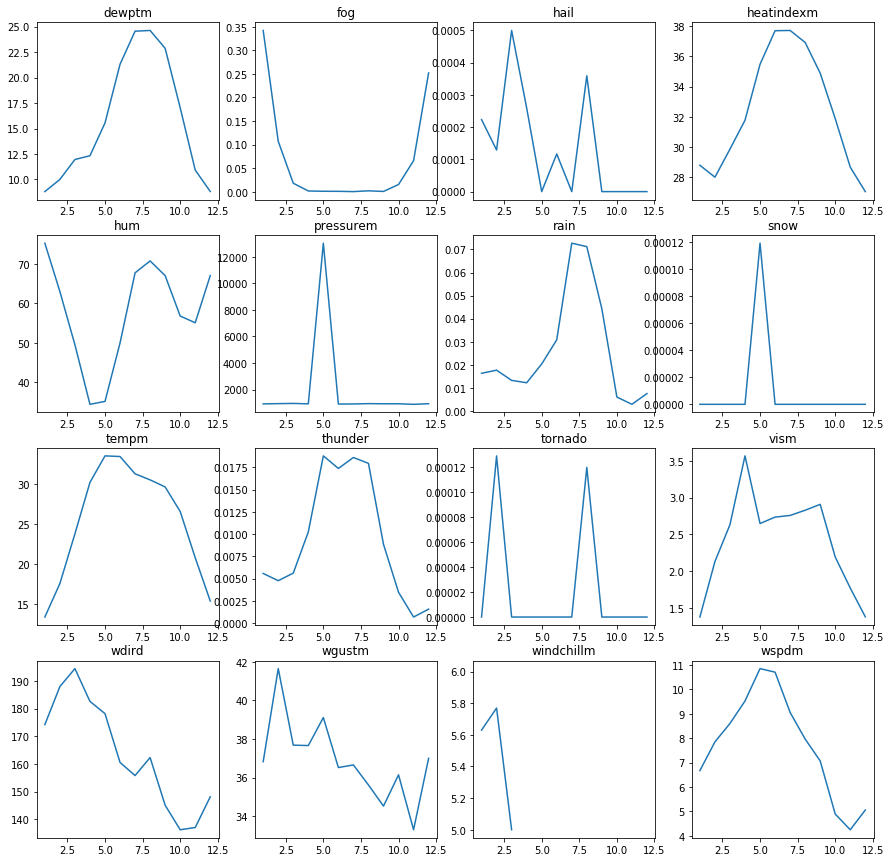

In [5]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(15,15))
l = ['dewptm', 'fog', 'hail', 'heatindexm', 'hum', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wgustm', 'windchillm', 'wspdm']
p=0
for i in range(4):
    for j in range(4):
        x,y=funcNew(l[p])
        axes[i][j].plot(x,y)
        axes[i][j].title.set_text(l[p])
        p+=1


# 2ques

In [6]:
data.head()


,datetimeutc,conds,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm,months
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4,11
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN,11
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN,11
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN,11
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0,11


In [7]:
l=data.groupby('months')
temp=l['conds'].value_counts()


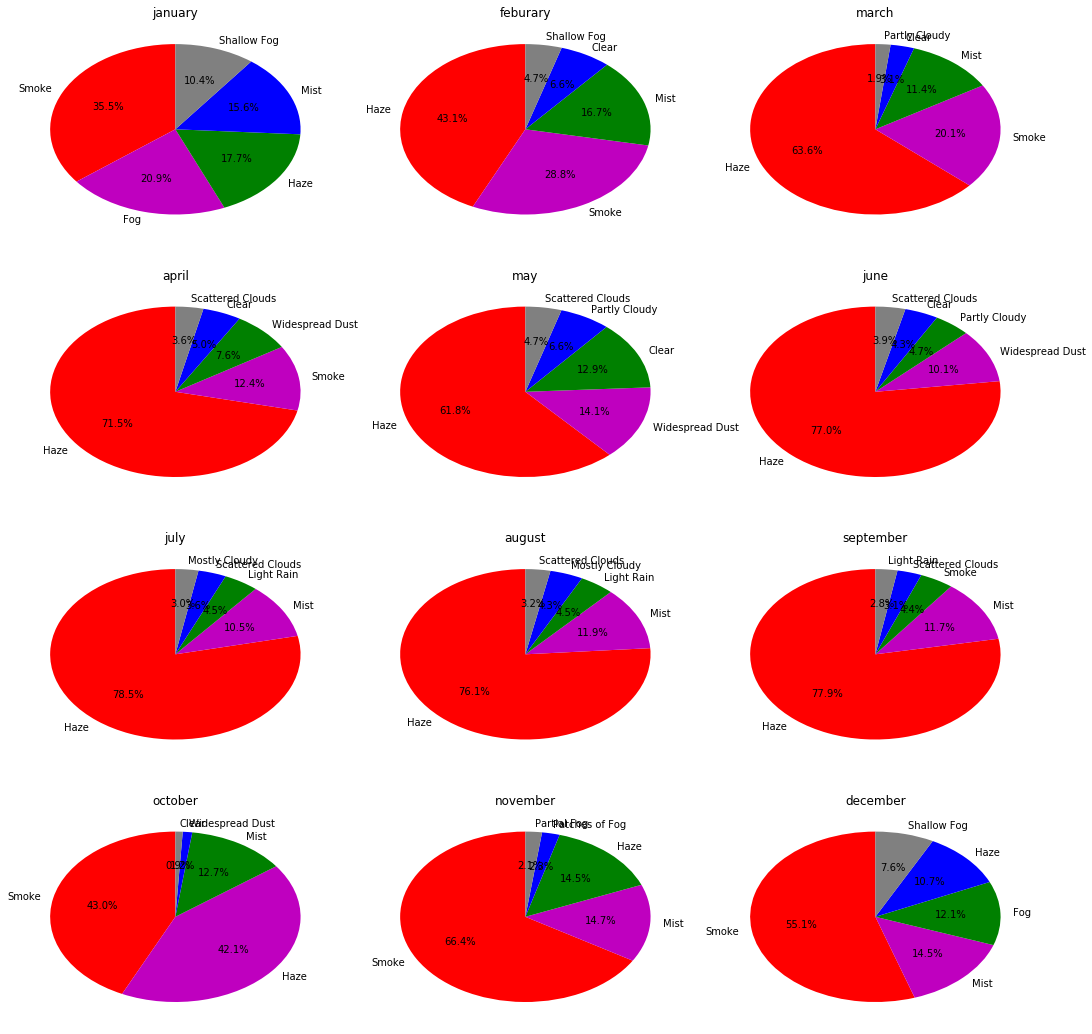

In [8]:
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,15))
p=['january','feburary','march','april','may','june','july','august','september','october','november','december']
colors = ['r', 'm', 'g', 'b','grey']
month=1

for i in range(4):
    for j in range(3):
        d=dict(temp[month].head(5)).items()
        act,slices=zip(*d)
        axes[i][j].pie(slices,labels=act,colors=colors,autopct="%1.1f%%", startangle=90)
        axes[i][j].title.set_text(p[month-1])
        month+=1
plt.tight_layout(pad=3)